In [1]:
!pip show nltk
!pip install --upgrade nltk

Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: C:\Users\dell\anaconda3\Lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob


In [2]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import load_files
!pip install stop_words
nltk.download('stopwords')
import pickle

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
#!pip install stop_words

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\\tweet_emotions.csv')
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
# Find any numerical variables.
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Num of numerical variables: {}\n'.format(len(numerical)))
print('The numerical variables are: ', numerical)

Num of numerical variables: 1

The numerical variables are:  ['tweet_id']


In [6]:
# Drop the unecessary column (numerical variables)
df = df.drop(columns=['tweet_id'])

In [7]:
# Count duplicates
duplicates_count = df.duplicated().sum()
print(f'Total duplicated rows: {duplicates_count}')

Total duplicated rows: 91


In [8]:
# Check for duplicates
df[df['content'].duplicated() == True]

,sentiment,content
366,worry,I feel so deflated. No more doggy.
521,worry,Somebody please save the polar bears!
1026,neutral,I'm at work
3684,sadness,@dublins98dave me too! I am down 400 euro
4363,worry,"is upset, I left my phone at home again"
...,...,...
39859,love,Happy Mothers Day
39898,love,happy mothers day!
39913,happiness,happy mother's day!
39915,love,happy mother's day everyone


In [9]:
# Drop duplicated values
index = df[df['content'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [10]:
# Final shape of data after dropping duplicates
df.shape

(39827, 2)

In [11]:
# Unique values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [12]:
# Frequency distribution of'sentiment'
frequency_counts = df['sentiment'].value_counts()

frequency_percentage = (frequency_counts / len(df['sentiment'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Print total value
cardinality = df['sentiment'].nunique()
print(f"\ntotal values: {cardinality}")

            Counts  Percentage
sentiment                     
neutral       8598   21.588370
worry         8437   21.184121
happiness     5184   13.016295
sadness       5154   12.940970
love          3785    9.503603
surprise      2181    5.476184
fun           1775    4.456776
relief        1522    3.821528
hate          1322    3.319356
empty          822    2.063926
enthusiasm     758    1.903231
boredom        179    0.449444
anger          110    0.276195

total values: 13


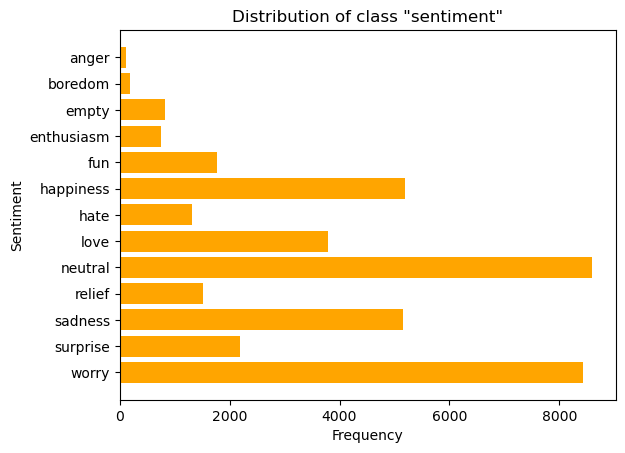

In [13]:
# Extract sentiment values & frequencies
sentiment_counts = df['sentiment'].value_counts().sort_index()

sentiments = sentiment_counts.index
frequencies = sentiment_counts.values

# Plot
plt.barh(sentiments, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')
plt.title('Distribution of class "sentiment"')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest sentiment at the top
plt.show()

In [14]:
# Values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [15]:
sentiment_mapping = {
    'empty': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'hate': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'enthusiasm': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'love': 'positive',
    'fun': 'positive',
    'happiness': 'positive',
    'relief': 'positive'
}

# Create a new col for the mapping
df['label'] = df['sentiment'].map(sentiment_mapping)

In [16]:
X = df['content']
y = df['label']

# Making sure that X y have the same length
print(len(X))
print(len(y))

39827
39827


In [17]:
# Cleaning and lemmatising
cleaned = []

for sen in range(0, len(X)):
    # Remove all the special characters (any letter or a digit)
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters (surrounded by whitespace)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization- splits into list of words ['The', 'quick', ....]
    document = document.split()

    lemma = WordNetLemmatizer()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    cleaned.append(document)

In [18]:
# Making sure that cleaned data has the same length as X
len(cleaned)

39827

In [19]:
# Count stopwords present in the data
nltk.download('punkt')
def count_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    return len(set(words) & stop_words)

# Add a new col 'stop_words' that contains the count of stopwords
df['stop_words'] = df['content'].apply(count_stopwords)
value_counts = df['stop_words'].value_counts()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Count the number of stopwords in the data
temp = df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & stop_words))

# Print rows that contain stopwords
rows_with_stopwords = temp[temp['stop_words'] > 0]
print(rows_with_stopwords)

        sentiment                                            content  \
0           empty  @tiffanylue i know  i was listenin to bad habi...   
1         sadness  Layin n bed with a headache  ughhhh...waitin o...   
3      enthusiasm               wants to hang out with friends SOON!   
4         neutral  @dannycastillo We want to trade with someone w...   
5           worry  Re-pinging @ghostridah14: why didn't you go to...   
...           ...                                                ...   
39819     neutral  @jasimmo Ooo showing of your French skills!! l...   
39820     neutral  @sendsome2me haha, yeah. Twitter has many uses...   
39823        love                     Happy Mothers Day  All my love   
39824        love  Happy Mother's Day to all the mommies out ther...   
39826        love  @mopedronin bullet train from tokyo    the gf ...   

          label  stop_words  
0      negative           6  
1      negative           4  
3      positive           3  
4       neutral

In [21]:
# Explore tweet that contains stopwords
df['content'][3]
# df.loc[3]

'wants to hang out with friends SOON!'

In [22]:
# Count stopwords in index 3
stop_words = set(stopwords.words("english"))
df_indx = df['content'][3]
stopword_count = len([word for word in df_indx.split() if word in stop_words])
stopword_count

3

In [23]:
# Print all the stopwords in index 3
stopwords_in_content = [word for word in df_indx.split() if word in stop_words]

print("Stopwords in df['content'][3]:")
print(stopwords_in_content)

Stopwords in df['content'][3]:
['to', 'out', 'with']


In [24]:
cleaned_tokenized = []
for each in cleaned:
    doc = sent_tokenize(each)
    for sentence in doc:
        cleaned_tokenized.append(sentence)

# Type and length of the cleaned & tokenised sentence
print(type(cleaned_tokenized))
print(len(cleaned_tokenized))

# Print the fist 15 lines of the cleaned & tokenised sentence
for i in range(15):
  print(cleaned_tokenized[i])

<class 'list'>
39827
tiffanylue know wa listenin to bad habit earlier and started freakin at his part
layin bed with headache ughhhh waitin on your call
funeral ceremony gloomy friday
want to hang out with friend soon
dannycastillo we want to trade with someone who ha houston ticket but no one will
re pinging ghostridah14 why didn you go to prom bc my bf didn like my friend
i should be sleep but im not thinking about an old friend who want but he married now damn amp he want me 2 scandalous
hmmm http www djhero com is down
charviray charlene my love miss you
kelcouch m sorry at least it friday
cant fall asleep
choked on her retainer
ugh have to beat this stupid song to get to the next rude
brodyjenner if watch the hill in london will realise what tourture it is because were week and week late just watch itonlinelol
got the news


In [25]:
# Crate a new colum that contains processed text
df['processed_content'] = cleaned_tokenized

# Reorder col
desired_order = ['content', 'processed_content', 'label']
df = df[desired_order]
df.head(10)

X = cleaned_tokenized

In [26]:
# Pick a random row, count SW in that sentence
df.loc[3]

content              wants to hang out with friends SOON!
processed_content       want to hang out with friend soon
label                                            positive
Name: 3, dtype: object

In [37]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)      # CV sparse matrix

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) # tf-idf sparse matrix
# print(tf_idf_matrix)
dense_tf_idf_matrix = tf_idf_matrix.toarray()         # tf-idf dense matrix
# print(dense_tf_idf_matrix)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, y, test_size=0.2, random_state=42)

In [38]:
# Final check - Extract unique values from 'sentiment'
import pandas as pd

unique_sentiments = df['label'].unique()
print(unique_sentiments)

['negative' 'positive' 'neutral']


In [54]:
df.head(5)

,content,processed_content,label
0,@tiffanylue i know i was listenin to bad habi...,tiffanylue know wa listenin to bad habit earli...,negative
1,Layin n bed with a headache ughhhh...waitin o...,layin bed with headache ughhhh waitin on your ...,negative
2,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,negative
3,wants to hang out with friends SOON!,want to hang out with friend soon,positive
4,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...,neutral


In [56]:
# Calculate the frequency distribution of 'sentiment'
frequency_counts = df['label'].value_counts()

frequency_percentage = (frequency_counts / len(df['label'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Total value count
cardinality = df['label'].nunique()
print(f"\ntotal values: {cardinality}")

          Counts  Percentage
label                       
negative   16024   40.234012
positive   13024   32.701434
neutral    10779   27.064554

total values: 3


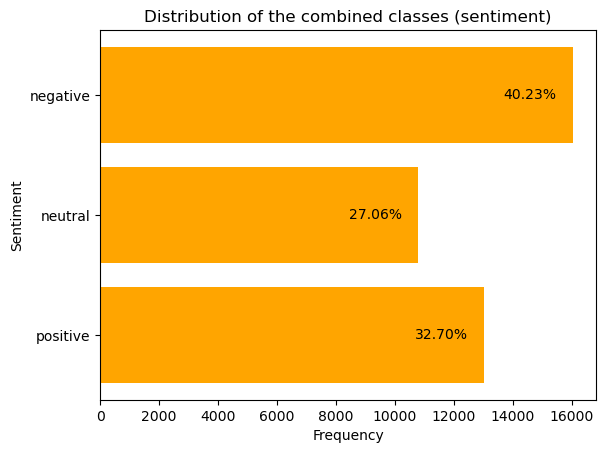

In [58]:
sentiment_counts = df['label'].value_counts().sort_index()

# Extract sentiment values & frequencies
sentiments = sentiment_counts.index
frequencies = sentiment_counts.values

total = sum(frequencies)  # Calculate the total frequency

plt.barh(sentiments, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')
plt.title('Distribution of the combined classes (sentiment)')
plt.gca().invert_yaxis()

# Annotate each bar with its percentage
for index, value in enumerate(frequencies):
    percentage = (value / total) * 100
    plt.text(value - (max(frequencies) * 0.09), index, f'{percentage:.2f}%', ha='center', va='center', color='black')

plt.show()

In [59]:
# Mapping sentiment num / encode
df["label_num"] = df.label.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2
})

df = df.drop(columns=['label'])
df.head(5)

,content,processed_content,label_num
0,@tiffanylue i know i was listenin to bad habi...,tiffanylue know wa listenin to bad habit earli...,0
1,Layin n bed with a headache ughhhh...waitin o...,layin bed with headache ughhhh waitin on your ...,0
2,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,0
3,wants to hang out with friends SOON!,want to hang out with friend soon,1
4,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...,2


In [62]:
X = df['content']
y = df['label_num']

# Making sure that X y have the same length
print(len(X))
print(len(y))

39827
39827


In [64]:
# Cleaning and lemmatising
cleaned = []

for sen in range(0, len(X)):
    # Remove all the special characters (any letter or a digit)
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters (surrounded by whitespace)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization- splits into list of words ['The', 'quick', ....]
    document = document.split()

    lemma = WordNetLemmatizer()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    cleaned.append(document)

In [65]:
len(cleaned)

39827

In [66]:
# Count stopwords present in the data
nltk.download('punkt')
def count_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    return len(set(words) & stop_words)

# Add a new col 'stop_words' that contains the count of stopwords
df['stop_words'] = df['content'].apply(count_stopwords)
value_counts = df['stop_words'].value_counts()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# Count the number of stopwords in the data
temp = df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & stop_words))

# Print rows that contain stopwords
rows_with_stopwords = temp[temp['stop_words'] > 0]
print(rows_with_stopwords)

                                                 content  \
0      @tiffanylue i know  i was listenin to bad habi...   
1      Layin n bed with a headache  ughhhh...waitin o...   
3                   wants to hang out with friends SOON!   
4      @dannycastillo We want to trade with someone w...   
5      Re-pinging @ghostridah14: why didn't you go to...   
...                                                  ...   
39819  @jasimmo Ooo showing of your French skills!! l...   
39820  @sendsome2me haha, yeah. Twitter has many uses...   
39823                     Happy Mothers Day  All my love   
39824  Happy Mother's Day to all the mommies out ther...   
39826  @mopedronin bullet train from tokyo    the gf ...   

                                       processed_content  label_num  \
0      tiffanylue know wa listenin to bad habit earli...          0   
1      layin bed with headache ughhhh waitin on your ...          0   
3                      want to hang out with friend soon          

In [68]:
# Explore tweet that contains stopwords
df['content'][3]
# df.loc[3]

'wants to hang out with friends SOON!'

In [69]:
# Count stopwords in index 3
stop_words = set(stopwords.words("english"))
df_indx = df['content'][3]
stopword_count = len([word for word in df_indx.split() if word in stop_words])
stopword_count

3

In [70]:
# Print all the stopwords in index 3
stopwords_in_content = [word for word in df_indx.split() if word in stop_words]

print("Stopwords in df['content'][3]:")
print(stopwords_in_content)

'''
The cleaned sentence from 4th row, ['wants to hang out with friends SOON!']
contains 3 stopwords, 'to', 'out', and 'with'
'''

Stopwords in df['content'][3]:
['to', 'out', 'with']


"\nThe cleaned sentence from 4th row, ['wants to hang out with friends SOON!']\ncontains 3 stopwords, 'to', 'out', and 'with'\n"

In [71]:
cleaned_tokenized = []
for each in cleaned:
    doc = sent_tokenize(each)
    for sentence in doc:
        cleaned_tokenized.append(sentence)

# Type and length of the cleaned & tokenised sentence
print(type(cleaned_tokenized))
print(len(cleaned_tokenized))

# Print the fist 15 lines of the cleaned & tokenised sentence
for i in range(15):
  print(cleaned_tokenized[i])

<class 'list'>
39827
tiffanylue know wa listenin to bad habit earlier and started freakin at his part
layin bed with headache ughhhh waitin on your call
funeral ceremony gloomy friday
want to hang out with friend soon
dannycastillo we want to trade with someone who ha houston ticket but no one will
re pinging ghostridah14 why didn you go to prom bc my bf didn like my friend
i should be sleep but im not thinking about an old friend who want but he married now damn amp he want me 2 scandalous
hmmm http www djhero com is down
charviray charlene my love miss you
kelcouch m sorry at least it friday
cant fall asleep
choked on her retainer
ugh have to beat this stupid song to get to the next rude
brodyjenner if watch the hill in london will realise what tourture it is because were week and week late just watch itonlinelol
got the news


In [75]:
# Crate a new colum that contains processed text
df['processed_content'] = cleaned_tokenized

# Reorder col
desired_order = ['content', 'processed_content']
df = df[desired_order]
df.head(10)

X = cleaned_tokenized

In [77]:
# Pick a random row, count SW in that sentence
df.loc[3]

content              wants to hang out with friends SOON!
processed_content       want to hang out with friend soon
Name: 3, dtype: object

In [79]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)      # CV sparse matrix

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) # tf-idf sparse matrix
# print(tf_idf_matrix)
dense_tf_idf_matrix = tf_idf_matrix.toarray()         # tf-idf dense matrix
# print(dense_tf_idf_matrix)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, y, test_size=0.2, random_state=42)

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.49      0.92      0.64     12834
           1       0.63      0.45      0.53     10395
           2       0.53      0.02      0.05      8632

    accuracy                           0.53     31861
   macro avg       0.55      0.47      0.41     31861
weighted avg       0.55      0.53      0.44     31861

Accuracy (Cross-Validation): 0.5254072376887103
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.49      0.91      0.64      3190
           1       0.65      0.49      0.56      2629
           2       0.50      0.03      0.05      2147

    accuracy                           0.53      7966
   macro avg       0.55      0.48      0.42      7966
weighted avg       0.55      0.53      0.46      7966

Accuracy (Test Data): 0.5333919156414763


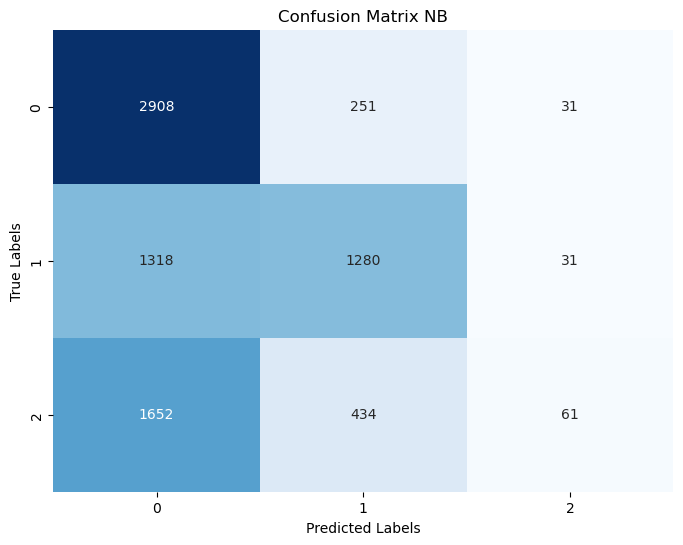

In [80]:
model = MultinomialNB()

# Train
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

classification_rep = classification_report(y_train, y_pred_cv)
print("Classification Report (Cross-Validation):\n", classification_rep)

accuracy = accuracy_score(y_train, y_pred_cv)
print("Accuracy (Cross-Validation):", accuracy)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

classification_rep_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Data):\n", classification_rep_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test Data):", accuracy_test)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix NB')
plt.show()


In [81]:
# Train
model = SVC()
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      3190
           1       0.65      0.59      0.62      2629
           2       0.48      0.35      0.41      2147

    accuracy                           0.59      7966
   macro avg       0.58      0.56      0.56      7966
weighted avg       0.58      0.59      0.58      7966

Accuracy: 0.5902585990459452
